<a href="https://colab.research.google.com/github/rahul-727/SPR-/blob/main/2348544_Lab8_SPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

The Viterbi Algorithm ensures the speech recognition system correctly maps acoustic feature vectors (observations) to the phoneme sequence "hello," determining the most likely interpretation of the audio input.

In [3]:
def viterbi_algorithm(A, B, pi, O):
    n_states = A.shape[0]
    n_observations = len(O)

    # Initialize the Viterbi table and backpointer table
    viterbi = np.zeros((n_states, n_observations))
    backpointer = np.zeros((n_states, n_observations), dtype=int)

    # Initialization step
    viterbi[:, 0] = pi * B[:, O[0]]

    # Recursion step
    for t in range(1, n_observations):
        for s in range(n_states):
            prob = viterbi[:, t-1] * A[:, s] * B[s, O[t]]
            viterbi[s, t] = np.max(prob)
            backpointer[s, t] = np.argmax(prob)

    # Termination step
    best_path_prob = np.max(viterbi[:, -1])
    best_last_state = np.argmax(viterbi[:, -1])

    # Backtrace to find the best path
    best_path = [best_last_state]
    for t in range(n_observations - 1, 0, -1):
        best_last_state = backpointer[best_last_state, t]
        best_path.insert(0, best_last_state)

    return best_path, best_path_prob

In [6]:
states = ["/h/", "/e/", "/l/", "/o/"]
observations = ["O1", "O2", "O3", "O4"]

A = np.array([
    [0.0, 0.7, 0.3, 0.0],
    [0.0, 0.2, 0.6, 0.2],
    [0.0, 0.0, 0.3, 0.7],
    [0.0, 0.0, 0.1, 0.9]
])

B = np.array([
    [0.6, 0.2, 0.1, 0.1],
    [0.1, 0.7, 0.1, 0.1],
    [0.1, 0.1, 0.6, 0.2],
    [0.2, 0.1, 0.2, 0.5]
])

pi = np.array([1.0, 0.0, 0.0, 0.0])

O = [0, 1, 2, 3]



In [7]:
def visualize_hmm(A, B, states, observations):
    G = nx.DiGraph()

    # Add states as nodes
    for state in states:
        G.add_node(state)

    # Add transitions as edges with weights
    for i, from_state in enumerate(states):
        for j, to_state in enumerate(states):
            if A[i, j] > 0:
                G.add_edge(from_state, to_state, weight=A[i, j])

    pos = nx.spring_layout(G, seed=42)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    # Draw the graph
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=2000, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d:.1f}" for u, v, d in G.edges(data="weight")})
    plt.title("Hidden Markov Model Transition Graph")
    plt.show()

    # Emission probabilities
    for i, state in enumerate(states):
        plt.bar(observations, B[i], alpha=0.7, label=f"{state} Emissions")
    plt.title("Emission Probabilities")
    plt.xlabel("Observations")
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

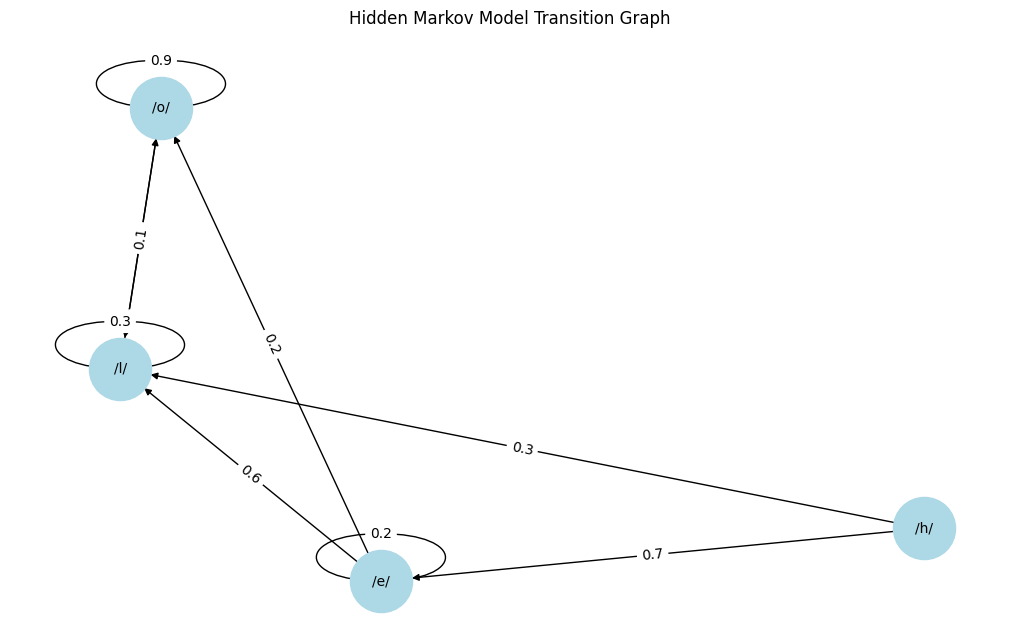

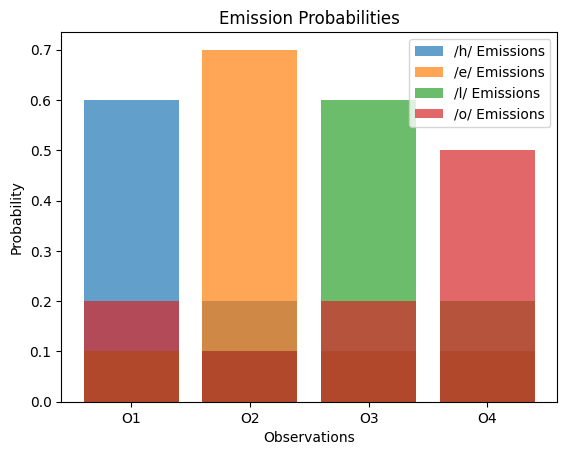

In [8]:
visualize_hmm(A, B, states, observations)

In [9]:
best_path, best_path_prob = viterbi_algorithm(A, B, pi, O)
best_path_states = [states[state] for state in best_path]

print("Most likely sequence of phoneme states:", best_path_states)
print("Probability of the most likely sequence:", best_path_prob)

Most likely sequence of phoneme states: ['/h/', '/e/', '/l/', '/o/']
Probability of the most likely sequence: 0.03704399999999999
